# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [8]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[9], verbose=True)

Training/Valid data shape: (231, 22, 1000)
Test data shape: (47, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.56685
	Train loss: 0.04551, Accuracy: 44/184 (23.91%)
	Validation loss: 0.02997, Accuracy: 13/47 (27.66%)
	Test loss: 0.02938, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.29914
	Train loss: 0.04583, Accuracy: 50/184 (27.17%)
	Validation loss: 0.03117, Accuracy: 13/47 (27.66%)
	Test loss: 0.03050, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.08636
	Train loss: 0.04343, Accuracy: 60/184 (32.61%)
	Validation loss: 0.03048, Accuracy: 13/47 (27.66%)
	Test loss: 0.03071, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.09236
	Train loss: 0.04280, Accuracy: 67/184 (36.41%)
	Validation loss: 0.03045, Accuracy: 16/47 (34.04%)
	Test loss: 0.03134, Accuracy: 14/47 (29.79%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.19597
	Train loss: 0.04289, Accuracy: 72/184 (39.13%)
	Validation loss: 0.03125, Accuracy: 15/47 (31.91%)
	Test loss: 0.032

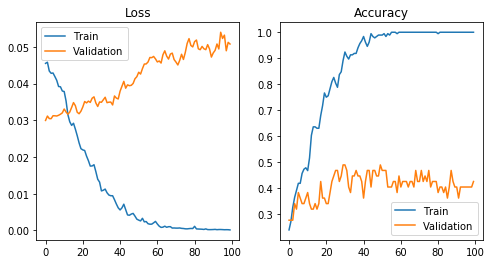

In [15]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.45728
	Train loss: 0.04524, Accuracy: 46/184 (25.00%)
	Validation loss: 0.02999, Accuracy: 12/47 (25.53%)
	Test loss: 0.02987, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.36968
	Train loss: 0.04517, Accuracy: 46/184 (25.00%)
	Validation loss: 0.02992, Accuracy: 12/47 (25.53%)
	Test loss: 0.02981, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.37327
	Train loss: 0.04498, Accuracy: 46/184 (25.00%)
	Validation loss: 0.02998, Accuracy: 12/47 (25.53%)
	Test loss: 0.02978, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.38667
	Train loss: 0.04441, Accuracy: 55/184 (29.89%)
	Validation loss: 0.02983, Accuracy: 10/47 (21.28%)
	Test loss: 0.02972, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.30324
	Train loss: 0.04315, Accuracy: 71/184 (38.59%)
	Validation loss: 0.02990, Accuracy: 11/47 (23.40%)
	Test loss: 0.029

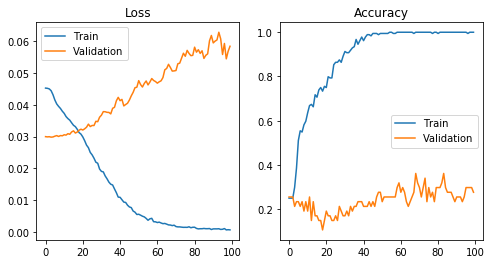

In [19]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.41603
	Train loss: 0.04509, Accuracy: 51/184 (27.72%)
	Validation loss: 0.02963, Accuracy: 12/47 (25.53%)
	Test loss: 0.02952, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.34764
	Train loss: 0.04473, Accuracy: 55/184 (29.89%)
	Validation loss: 0.02980, Accuracy: 7/47 (14.89%)
	Test loss: 0.02934, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.34316
	Train loss: 0.04377, Accuracy: 66/184 (35.87%)
	Validation loss: 0.03024, Accuracy: 8/47 (17.02%)
	Test loss: 0.02901, Accuracy: 15/47 (31.91%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.31196
	Train loss: 0.04290, Accuracy: 78/184 (42.39%)
	Validation loss: 0.03082, Accuracy: 11/47 (23.40%)
	Test loss: 0.02886, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.22991
	Train loss: 0.04211, Accuracy: 81/184 (44.02%)
	Validation loss: 0.03121, Accuracy: 11/47 (23.40%)
	Test loss: 0.02872

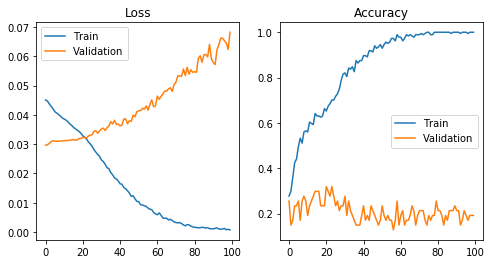

In [18]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.39262
	Train loss: 0.04523, Accuracy: 43/184 (23.37%)
	Validation loss: 0.02954, Accuracy: 13/47 (27.66%)
	Test loss: 0.02943, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.38548
	Train loss: 0.04517, Accuracy: 55/184 (29.89%)
	Validation loss: 0.02954, Accuracy: 15/47 (31.91%)
	Test loss: 0.02943, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.38173
	Train loss: 0.04504, Accuracy: 51/184 (27.72%)
	Validation loss: 0.02950, Accuracy: 8/47 (17.02%)
	Test loss: 0.02939, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.37792
	Train loss: 0.04470, Accuracy: 52/184 (28.26%)
	Validation loss: 0.02932, Accuracy: 8/47 (17.02%)
	Test loss: 0.02920, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.36690
	Train loss: 0.04416, Accuracy: 67/184 (36.41%)
	Validation loss: 0.02902, Accuracy: 17/47 (36.17%)
	Test loss: 0.02889

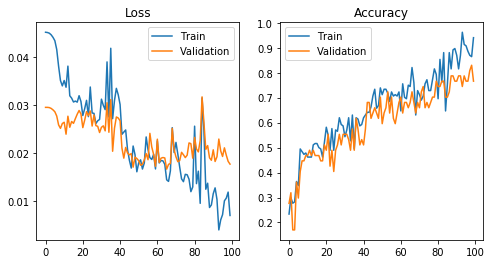

In [13]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.40908
	Train loss: 0.04517, Accuracy: 44/184 (23.91%)
	Validation loss: 0.02948, Accuracy: 14/47 (29.79%)
	Test loss: 0.02946, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.36845
	Train loss: 0.04446, Accuracy: 61/184 (33.15%)
	Validation loss: 0.02914, Accuracy: 13/47 (27.66%)
	Test loss: 0.02907, Accuracy: 14/47 (29.79%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.32567
	Train loss: 0.04179, Accuracy: 87/184 (47.28%)
	Validation loss: 0.02762, Accuracy: 20/47 (42.55%)
	Test loss: 0.02761, Accuracy: 18/47 (38.30%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.26865
	Train loss: 0.03881, Accuracy: 77/184 (41.85%)
	Validation loss: 0.02585, Accuracy: 20/47 (42.55%)
	Test loss: 0.02624, Accuracy: 19/47 (40.43%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.17875
	Train loss: 0.03895, Accuracy: 77/184 (41.85%)
	Validation loss: 0.02597, Accuracy: 20/47 (42.55%)
	Test loss: 0.027

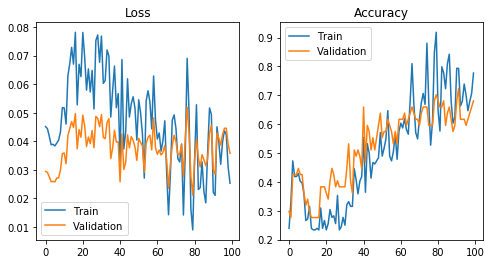

In [17]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)